# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data


training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [2]:
# dictionary to map the numbers and the definition 
import pandas as pd
signnames = pd.read_csv("signnames.csv")
signnames = [i for i in signnames["SignName"]]
print(signnames)



['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(signnames)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)

print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

The label is  15
It's image  29976  in the training data


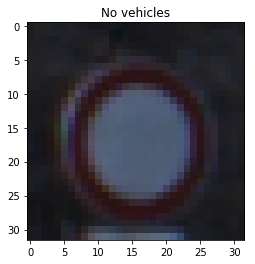

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np
index = np.random.randint(0, n_train)
image = X_train[index]
plt.title(signnames[y_train[index]])
plt.imshow(image)
print("The label is ", y_train[index])
print("It's image ", index, " in the training data")



Label 0 has 180 training examples	Label 1 has 1980 training examples	Label 2 has 2010 training examples	
Label 3 has 1260 training examples	Label 4 has 1770 training examples	Label 5 has 1650 training examples	
Label 6 has 360 training examples	Label 7 has 1290 training examples	Label 8 has 1260 training examples	
Label 9 has 1320 training examples	Label 10 has 1800 training examples	Label 11 has 1170 training examples	
Label 12 has 1890 training examples	Label 13 has 1920 training examples	Label 14 has 690 training examples	
Label 15 has 540 training examples	Label 16 has 360 training examples	Label 17 has 990 training examples	
Label 18 has 1080 training examples	Label 19 has 180 training examples	Label 20 has 300 training examples	
Label 21 has 270 training examples	Label 22 has 330 training examples	Label 23 has 450 training examples	
Label 24 has 240 training examples	Label 25 has 1350 training examples	Label 26 has 540 training examples	
Label 27 has 210 training examples	Label 2

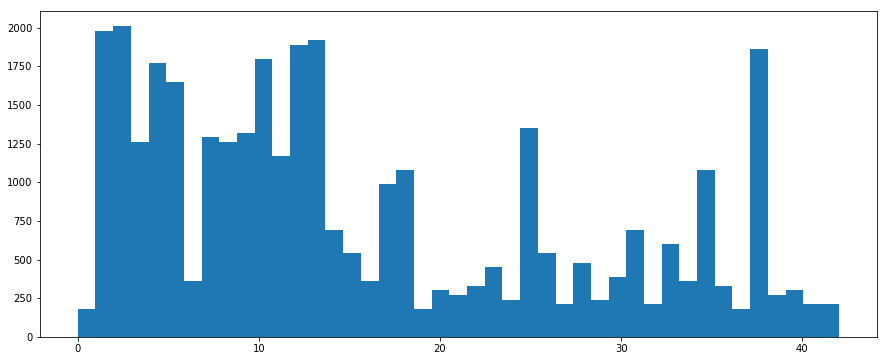

In [5]:
for i in range(43):
    if i%3 == 0 and i!=0:
        print()
        print("Label %d has %d training examples\t" %(i, np.sum(y_train==i)),end="")
    else:
        print("Label %d has %d training examples\t" %(i, np.sum(y_train==i)),end="")

fig = plt.figure(figsize=(15,6))
plt.hist(y_train, bins=43, histtype="bar")
plt.show()

Label 0 has 4320 training examples	Label 1 has 5940 training examples	Label 2 has 6030 training examples	
Label 3 has 5040 training examples	Label 4 has 5310 training examples	Label 5 has 4950 training examples	
Label 6 has 4320 training examples	Label 7 has 5160 training examples	Label 8 has 5040 training examples	
Label 9 has 5280 training examples	Label 10 has 5400 training examples	Label 11 has 4680 training examples	
Label 12 has 5670 training examples	Label 13 has 5760 training examples	Label 14 has 4830 training examples	
Label 15 has 4320 training examples	Label 16 has 4320 training examples	Label 17 has 4950 training examples	
Label 18 has 4320 training examples	Label 19 has 4320 training examples	Label 20 has 4500 training examples	
Label 21 has 4320 training examples	Label 22 has 4290 training examples	Label 23 has 4500 training examples	
Label 24 has 4320 training examples	Label 25 has 5400 training examples	Label 26 has 4320 training examples	
Label 27 has 4410 training ex

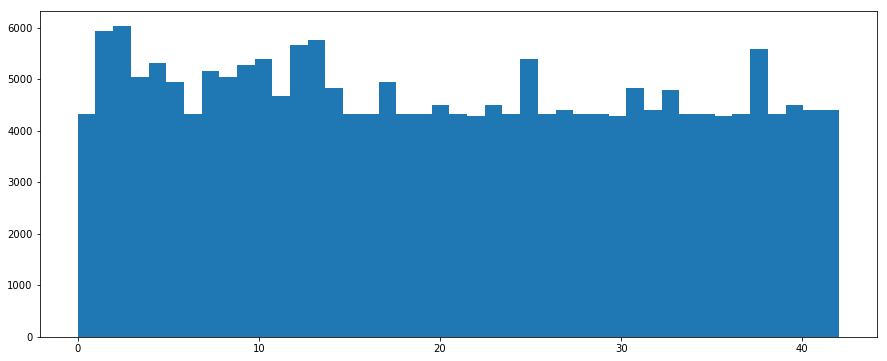

In [6]:
for i in range(43):
    samples = np.sum(y_train==i)
    tt = X_train[y_train==i]
    yy = (np.ones(samples)*i).astype("int32")
    scale = 4200//samples
    for j in range(scale):
        X_train=np.append(X_train, tt, axis = 0)
        y_train=np.append(y_train, yy, axis = 0)

            
for i in range(43):
    if i%3 == 0 and i!=0:
        print()
        print("Label %d has %d training examples\t" %(i, np.sum(y_train==i)),end="")
    else:
        print("Label %d has %d training examples\t" %(i, np.sum(y_train==i)),end="")

fig = plt.figure(figsize=(15,6))
plt.hist(y_train, bins=43, histtype="bar")
plt.show()

In [7]:
print("There used to be",n_train,"training examples in the data set" )
print("...")
print("Now there are",len(y_train), "training examples")

There used to be 34799 training examples in the data set
...
Now there are 203452 training examples


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

------------------------------------












This cell can be located before the "Include an exploratory visualization of the dataset" section
It can help avoid processing a larger data set.

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.



# Use Min-Max Scaling instead of standardization here in case there are some padding later.
def mm_scale(image):
    """
    Normalized a picture, map all pixal to the range [0,1]
    
    Parameter:
    image: numpy array image with a [0-225] threshold
    
    Returns:
    image: a dtype = "float32" Numpy array image.
    
    """
    image = image/255
    return image.astype("float32")


X_train = mm_scale(X_train)
X_valid = mm_scale(X_valid)
X_test = mm_scale(X_test)
assert X_train.dtype == "float32"

### Model Architecture

In [9]:
def evaluate(X_data, y_data):
    """
    evaluate the accuracy of prediction the input data and input labels
    
    Parameters:
    X_data: feature set
    y_data: labels
    
    Returns: 
    a float number of the accuracy
    
    """
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def MyNet(x):    
    """
    Defined the NN model and apply it to the input to get the predction 
    
    Parameters:
    x: images 
    Returns:
    logits: the softmax output of the predctions of input images after the model
    
    """
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    # Convolutional Layer 1:  Input = 32x32x3. Output = 28x28x24.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,24),mean = mu, stddev=sigma), name = "conv1_w")
    conv1_b = tf.Variable(tf.zeros(24),name = "conv1_b")
    conv1_z = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding="VALID")+conv1_b
    conv1_a = tf.nn.tanh(conv1_z)
    # max-pooling 28*28*24-> 14*14*24
    conv1_p = tf.nn.max_pool(conv1_a, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    
    # Convolutional Layer 2: 14x14x24. Output = 10x10x48.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,24,48),mean = mu, stddev=sigma),name = "conv2_w")
    conv2_b = tf.Variable(tf.zeros(48),name = "conv2_b")
    conv2_z = tf.nn.conv2d(conv1_p, conv2_w, strides = [1,1,1,1], padding = "VALID")+conv2_b
    conv2_a = tf.nn.tanh(conv2_z)
    # max-pooling 10*10*48 -> 5*5*48
    conv2_p = tf.nn.max_pool(conv2_a, ksize=[1,2,2,1], strides = [1,2,2,1], padding = "VALID")
    
    # Flatten  5*5*48 -> 1*1200
    fc0 = flatten(conv2_p)
    
    # Fully Connect Layer 1; Input = 1200. Output = 400.
    fc1_w = tf.Variable(tf.truncated_normal(shape=[1200,400],mean=mu, stddev=sigma),name = "fc1_w")
    fc1_b = tf.Variable(tf.zeros(400),name = "fc1_b")
    fc1_z = tf.matmul(fc0,fc1_w)+fc1_b
    fc1_a = tf.nn.tanh(fc1_z)
    
    # Fully Connected Layer 2. Input = 400. Output = 200.
    fc2_w = tf.Variable(tf.truncated_normal(shape=[400,200],mean=mu, stddev=sigma),name = "fc2_w")
    fc2_b = tf.Variable(tf.zeros(200),name = "fc2_b")
    fc2_z = tf.matmul(fc1_a,fc2_w)+fc2_b
    fc2_a = tf.nn.tanh(fc2_z)
    
    # Fully Connected Layer 3. Input = 200. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=[200,43],mean=mu, stddev=sigma),name = "fc3_w")
    fc3_b = tf.Variable(tf.zeros(43), name ="fc3_b")
    fc3_z = tf.matmul(fc2_a,fc3_w)+fc3_b
    fc3_a = tf.nn.softmax(fc3_z)
    
    
    logits = fc3_a
    
    return logits




### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed
def train_model(X_train, y_train, sess): 
    """
    Train the model, update the variables defined in MyNet.
    
    Parameter:
    X_train: training data
    y_train: training labels
    sess: current session
    
    Returns:
    None
    """
    num_examples = len(X_train)
    print("Training...")
    print()
    tic = time.time()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)

        if validation_accuracy >0.98: #early stop
            print("EPOCH {} ...".format(i+1))
            print("Now the validation Accuracy is {:.3f}, break".format(validation_accuracy))
            break
        
        toc = time.time()
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time spent %.2f"%(toc-tic))


In [12]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
rate = 0.001
EPOCHS = 15
BATCH_SIZE = 100

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()
import time

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    train_model(X_train, y_train, sess)
    saver.save(sess, './mynet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.996
Validation Accuracy = 0.952
Time spent 18.07
EPOCH 2 ...
Training Accuracy = 0.998
Validation Accuracy = 0.955
Time spent 35.42
EPOCH 3 ...
Training Accuracy = 0.998
Validation Accuracy = 0.957
Time spent 52.45
EPOCH 4 ...
Training Accuracy = 0.998
Validation Accuracy = 0.960
Time spent 69.63
EPOCH 5 ...
Training Accuracy = 0.999
Validation Accuracy = 0.961
Time spent 86.73
EPOCH 6 ...
Training Accuracy = 0.995
Validation Accuracy = 0.941
Time spent 103.93
EPOCH 7 ...
Training Accuracy = 0.999
Validation Accuracy = 0.965
Time spent 121.19
EPOCH 8 ...
Training Accuracy = 0.999
Validation Accuracy = 0.966
Time spent 138.53
EPOCH 9 ...
Training Accuracy = 0.999
Validation Accuracy = 0.962
Time spent 155.79
EPOCH 10 ...
Training Accuracy = 0.999
Validation Accuracy = 0.962
Time spent 173.00
EPOCH 11 ...
Training Accuracy = 0.999
Validation Accuracy = 0.969
Time spent 190.08
EPOCH 12 ...
Training Accuracy = 0.999
Validation Accuracy = 0.958

In [14]:
# test accuracy
with tf.Session() as sess:
    saver.restore(sess, './mynet')
    test_accuracy = evaluate(X_test, y_test)
    print("test Accuracy = {:.4f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./mynet
test Accuracy = 0.9493


# ---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [15]:
def to_32(image):
    """
    Convert image size： [64,64,4] -> [1,32,32,3] 
    
    Parameters: 
    image: a [64,64,4] numpy array
    
    Return:  
    a [1, 32, 32,3] numpy array
    """
    image = image[:,:,0:3].reshape([1,64,64,3])
    image = mm_scale(image)
    # Maxpool:  Input = 64x64x3. Output = 32x32x3
    k = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    return tf.Session().run(k)

In [16]:
def predict_sign(image, sess):
    """
    Parameters: 
    image: image tensor with shape of [None, 32,32,3]
    sess: current session
    
    Returns:
    img_label: an Integer of the image's prediction
    
    """
    img_label = sess.run(tf.argmax(logits,1),feed_dict={x: image})[0] 

    return img_label


### Predict the Sign Type for Each Image

In [17]:

# ### Load the images and plot them here.
# ### Feel free to use as many code cells as needed.
import matplotlib.image as img
im_own_name_set = ["14-1.jpg","1-1.jpg","13-1.jpg","17-1.jpg","17-2.jpg"]
im_own_label_set = [14,1,13,17,17]



INFO:tensorflow:Restoring parameters from ./mynet
Prediction 14-1.jpg  : Stop                         14	It's correct
Prediction 1-1.jpg   : Speed limit (30km/h)          1	It's correct
Prediction 13-1.jpg  : Yield                        13	It's correct
Prediction 17-1.jpg  : No entry                     17	It's correct
Prediction 17-2.jpg  : No entry                     17	It's correct


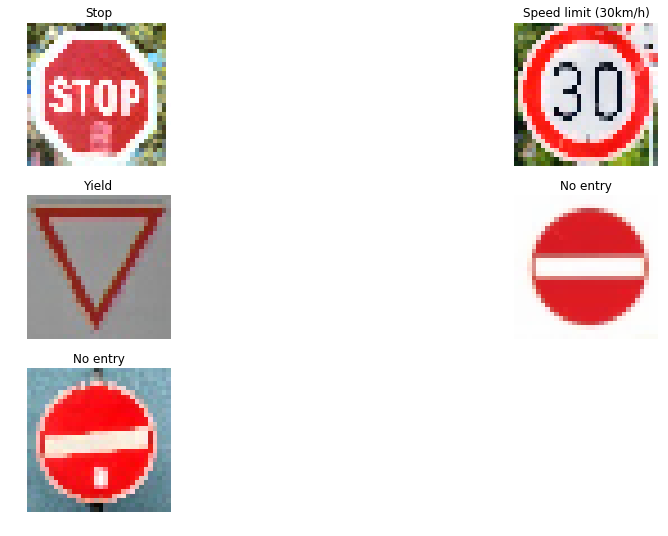

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# for 5 images accuracy summary (next cell)
correct_pred = 0
img_amount = len(im_own_name_set)
own_accuracy = 0    


with tf.Session() as sess:
    saver.restore(sess, './mynet')
    fig = plt.figure(figsize=(16,9))
    index = 0
    
    for i in im_own_name_set:
        im = img.imread("New Images/"+i).astype("float32")
        k = to_32(im)
        fig.add_subplot(3,2,index+1)
        plt.title(signnames[im_own_label_set[index]])

        plt.imshow(k[0,:,:,:])
        plt.axis("off")
        prediction = predict_sign(k,sess)
        correct_label = im_own_label_set[index]
        correct_name = signnames[correct_label]
        if prediction == correct_label:
            correct_pred +=1
            print("Prediction %-9s : %-28s %2d\tIt's correct"%(i,signnames[prediction],prediction))
        else:
            print("Prediction %-9s : %-28s %2d\tThe correct label is %s"%(i,signnames[prediction],prediction,correct_name))
        index +=1
    own_accuracy = correct_pred/img_amount

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
print("The accuracy for the 5 images is %d%%" %(own_accuracy*100))

The accuracy for the 5 images is 100%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./mynet
The top 5 possible label for the given image [[14-1.jpg]] are
14 	 Stop :  1.0
17 	 No entry :  4.26742e-11
13 	 Yield :  3.20605e-12
1 	 Speed limit (30km/h) :  1.40063e-15
2 	 Speed limit (50km/h) :  3.66033e-16

The top 5 possible label for the given image [[1-1.jpg]] are
1 	 Speed limit (30km/h) :  0.997394
2 	 Speed limit (50km/h) :  0.00260605
6 	 End of speed limit (80km/h) :  4.15036e-07
21 	 Double curve :  5.16694e-08
31 	 Wild animals crossing :  1.68253e-09

The top 5 possible label for the given image [[13-1.jpg]] are
13 	 Yield :  1.0
0 	 Speed limit (20km/h) :  1.22172e-15
39 	 Keep left :  6.53608e-16
8 	 Speed limit (120km/h) :  2.21544e-16
7 	 Speed limit (100km/h) :  8.50117e-17

The top 5 possible label for the given image [[17-1.jpg]] are
17 	 No entry :  1.0
0 	 Speed limit (20km/h) :  2.73826e-10
14 	 Stop :  2.34833e-14
1 	 Speed limit (30km/h) :  1.26694e-14
8 	 Speed limit (120km/h) :  2.80624e-16

The top 5 po

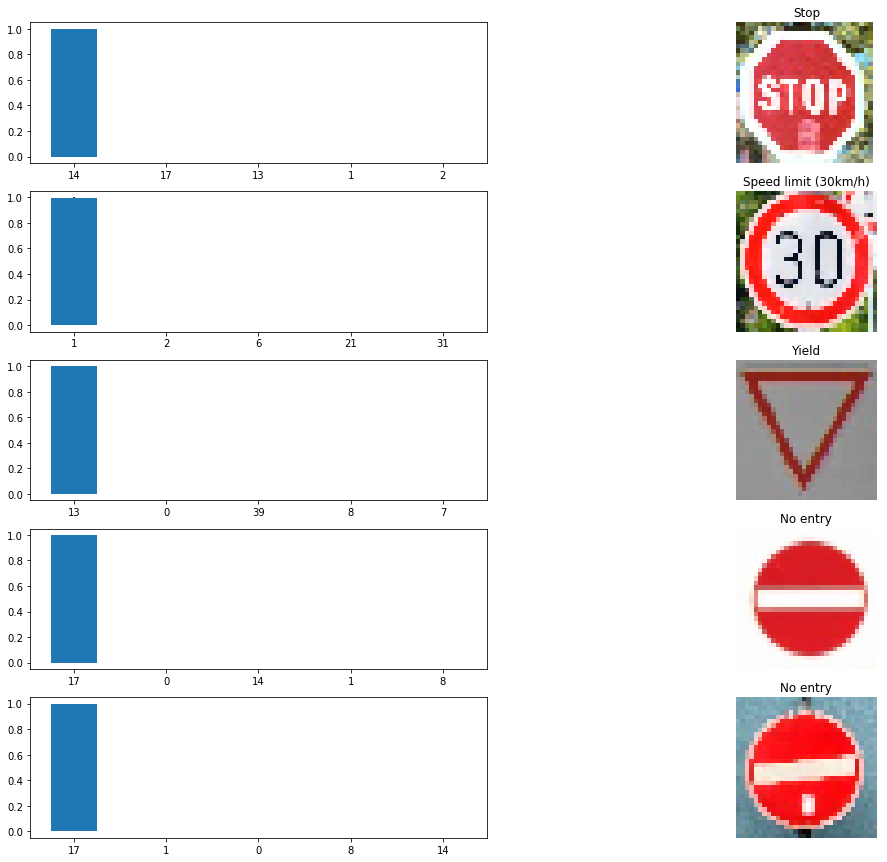

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
fig = plt.figure(figsize=(18,15))
with tf.Session() as sess:
    saver.restore(sess, "./mynet")
    index = 0
    for i in im_own_name_set:
        im = img.imread("New Images/"+i).astype("float32")
        im = to_32(im)
        all_probs = sess.run(logits, feed_dict={x:im})
        top5 = sess.run(tf.nn.top_k(all_probs, k=5))
        
        print("The top 5 possible label for the given image [[%s]] are"%(i))
        for k in range(5):
            print(top5[1][0][k],"\t",signnames[top5[1][0][k]], ": ", top5[0][0][k])
        
        fig.add_subplot(5,2,2*index+1)
        rects =plt.bar(left = (0.2,0.4,0.6,0.8,1),height = list(top5[0][0]),width = 0.1,align="center",yerr=0.0001)
        plt.xticks((0.2,0.4,0.6,0.8,1), top5[1][0])
        
        fig.add_subplot(5,2,2*index+2)
        plt.imshow(im[0,:,:,:])
        plt.axis("off")
        plt.title(signnames[im_own_label_set[index]])
        index +=1
        print()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
            